# Jupyter Notebook to demonstrate the basic plotting capabilities of the **SEABORN** library
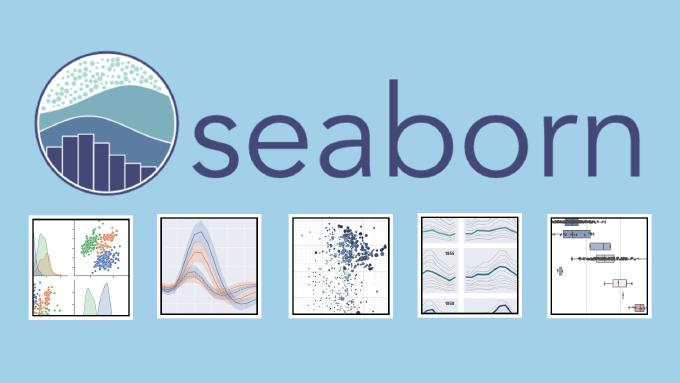

This Jupyter notebook provide **Seaborn** plotting examples and a tutorial to get started. You can execute jupyter notebook from your Python terminal to try out the notebooks locally on your own machine.
Alternatively you can upload the jupyter notebook e.g. to **colab.research.google.com** and try it out in a cloud notebook sandbox

---  
**Note**: *Seaborn* is a **data visualization library** built on top of *matplotlib* and closely integrated with *pandas* data structures in Python.  
Visualization is the central part of Seaborn which helps in exploration and understanding of data.

---  
Source/Links:
+ Use the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas for more information and full documentation  
+ https://github.com/jakevdp/PythonDataScienceHandbook
The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*


---

Author:
*   dr.daniel benninger  

History:
*   v1, June 2021, dbe --- minor adaptions for CAS BIA11
*   v2, Febr 2024, dbe --- minor corrections for BINA FS24 (e.g. depreciated parms, funcs)  
---  

# Visualization with Seaborn

### Introduction       
*Matplotlib* has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of [MATLAB](https://de.wikipedia.org/wiki/Matlab) circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires *a lot of boilerplate code*.
- Matplotlib predated *Pandas* by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this. The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.   

But for all the reasons just discussed, *Seaborn* remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a **simple random-walk plot in Matplotlib**, using its classic plot formatting and colors.  

We start with the typical imports:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [ ]:
# Create some random data (using numpy library functions)
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

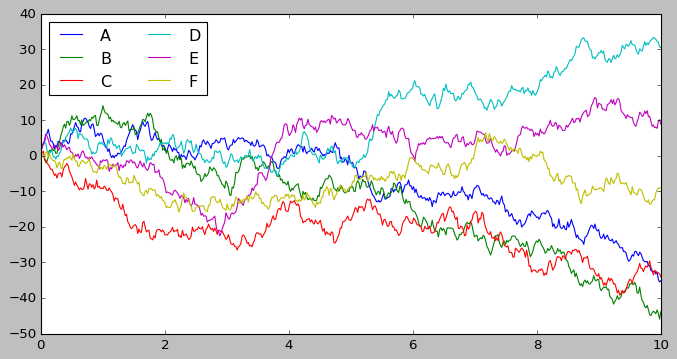

In [ ]:
# Plot the data with Matplotlib defaults
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a **look at how it works with Seaborn**.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.   

By convention, Seaborn is imported as ``sns``:

In [ ]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

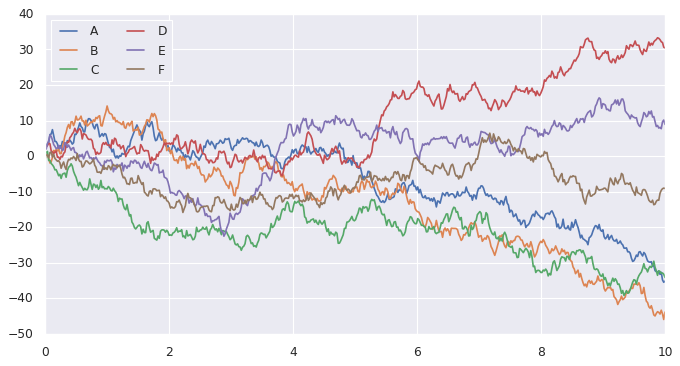

In [ ]:
# same plotting code as above!
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!

---  
## Exploring Seaborn Plots

The main idea of Seaborn is that it **provides high-level commands to create a variety of plot types useful for statistical data exploration**, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn.   

Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms and Densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.   

We have seen that this is relatively straightforward in Matplotlib:

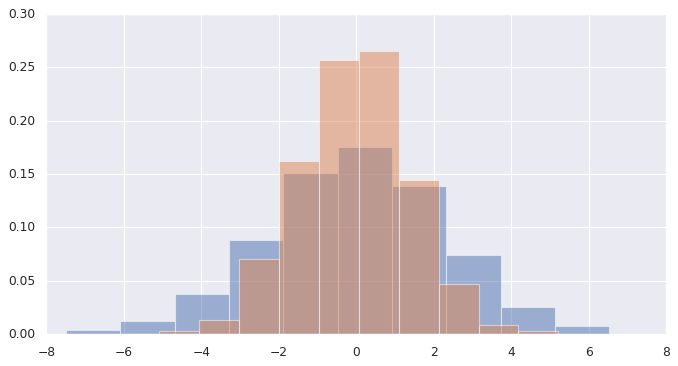

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

plt.figure(figsize=(10,5))
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation (KDE), which Seaborn does with ``sns.kdeplot``:

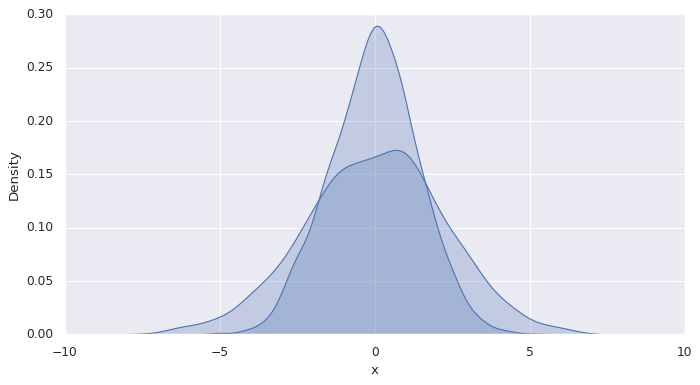

In [ ]:
plt.figure(figsize=(10,5))
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Histograms and KDE can be combined using ``displot``:

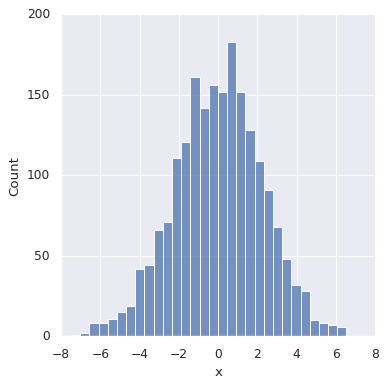

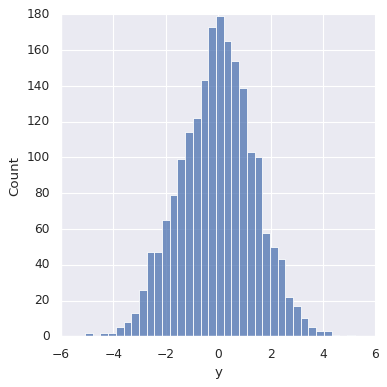

In [ ]:
sns.displot(data['x'])
sns.displot(data['y']);

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

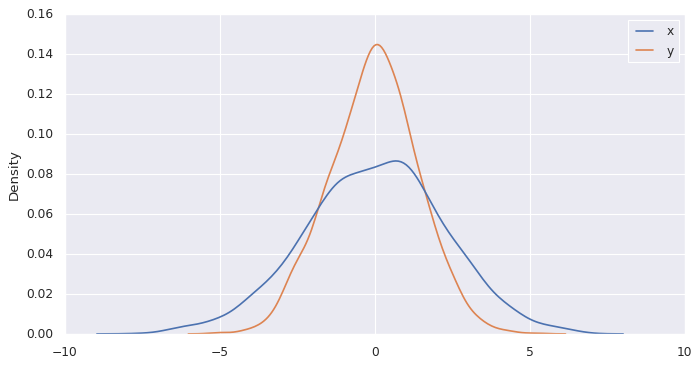

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.   

For this plot, we'll set the style to a white background:

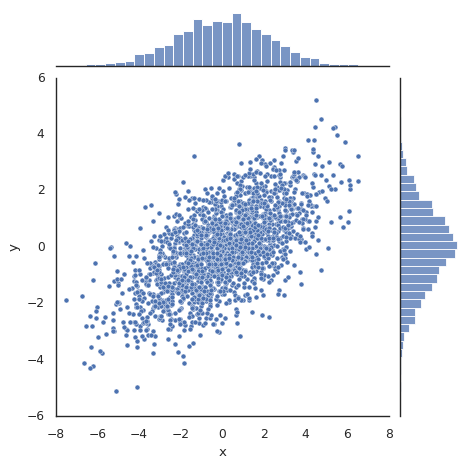

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y");

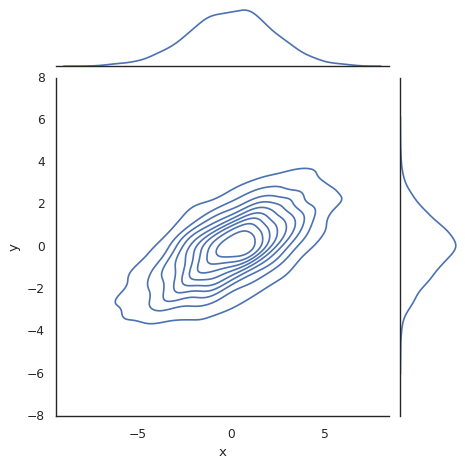

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

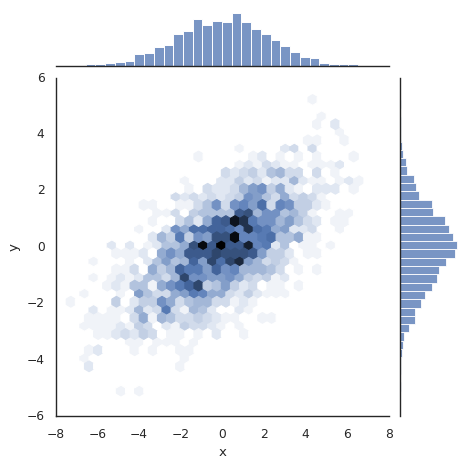

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind='hex')

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with **pair plots**. This is very useful for **exploring correlations between multidimensional data**, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known **Iris dataset**, which lists measurements of petals and sepals of three iris species:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

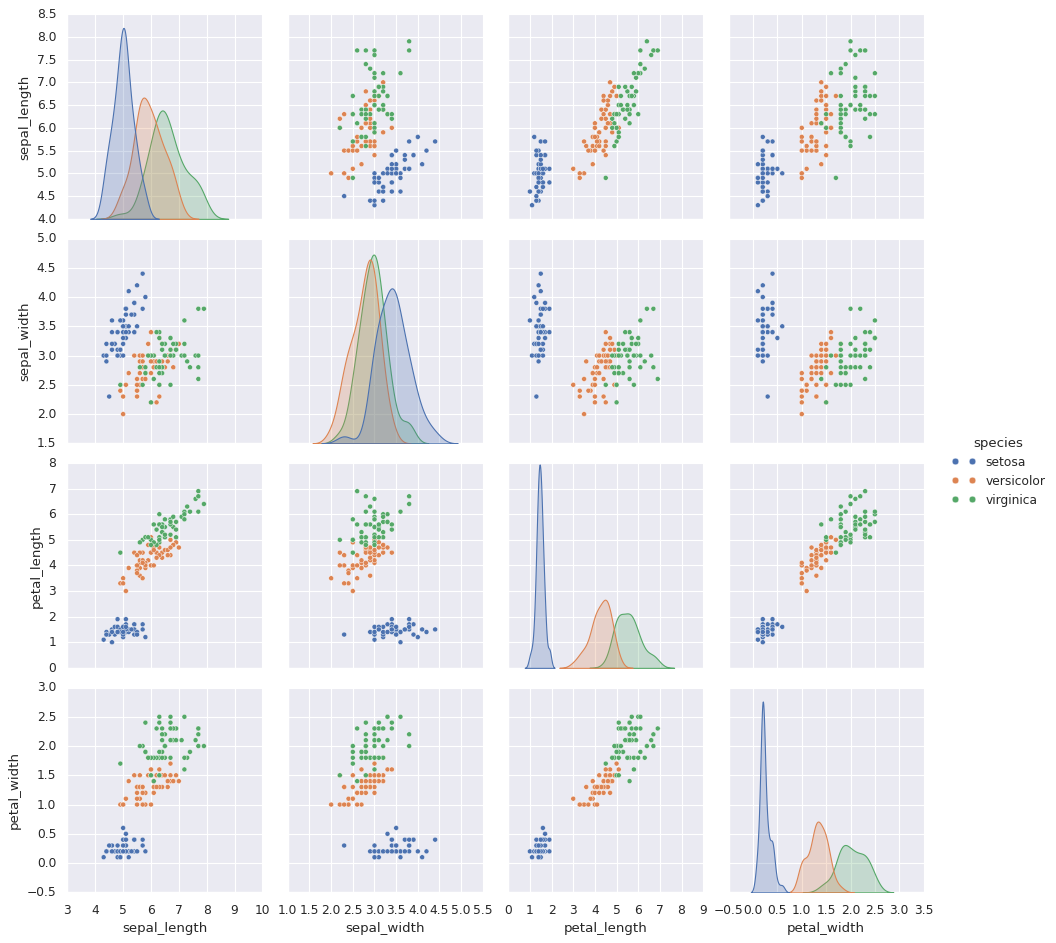

In [ ]:
sns.pairplot(iris, hue='species', height=3);

### Faceted histograms

Sometimes the best way to view data is via **histograms of subsets**. Seaborn's ``FacetGrid`` makes this extremely simple.  

We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


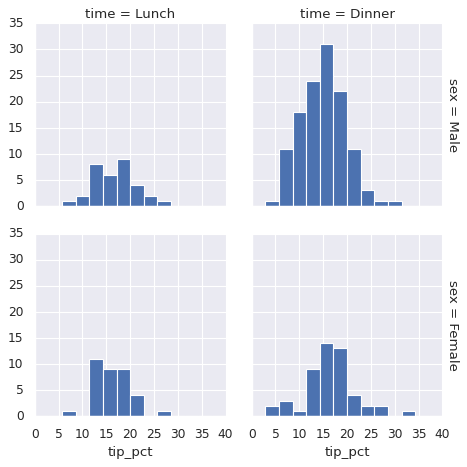

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor or Category plots

Factor or Category plots can be useful for this kind of visualization as well. This allows you to view the **distribution of a parameter** within bins defined by any other parameter:

<Figure size 1200x400 with 0 Axes>

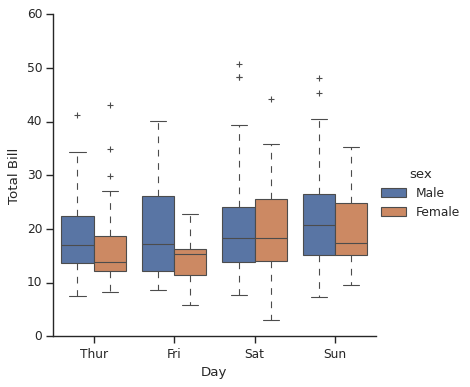

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to **show the joint distribution between different datasets**, along with the associated marginal distributions:

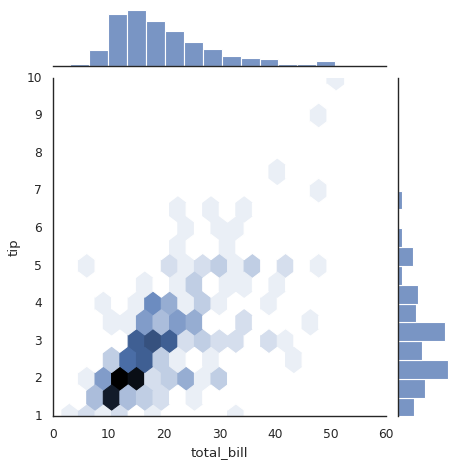

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data=tips, x="total_bill", y="tip",  kind='hex')

The joint plot can even do some automatic **kernel density estimation** and **regression**:

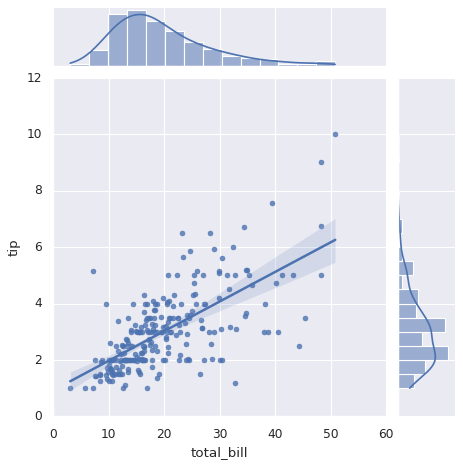

In [ ]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind='reg')

# and save the plot as PNG file
plt.savefig("seaborn_jointplot.png")

### Bar plots

Time series can be plotted using ``sns.factorplot``.  

In the following example, we'll use the **Planets dataset**:

In [ ]:
planets = sns.load_dataset('planets')
planets.head(20)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100,77.40,2006
1,Radial Velocity,1,874.774000,2.210,56.95,2008
2,Radial Velocity,1,763.000000,2.600,19.84,2011
3,Radial Velocity,1,326.030000,19.400,110.62,2007
4,Radial Velocity,1,516.220000,10.500,119.47,2009
5,Radial Velocity,1,185.840000,4.800,76.39,2008
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.300,73.10,2008
9,Radial Velocity,2,452.800000,1.990,74.79,2010


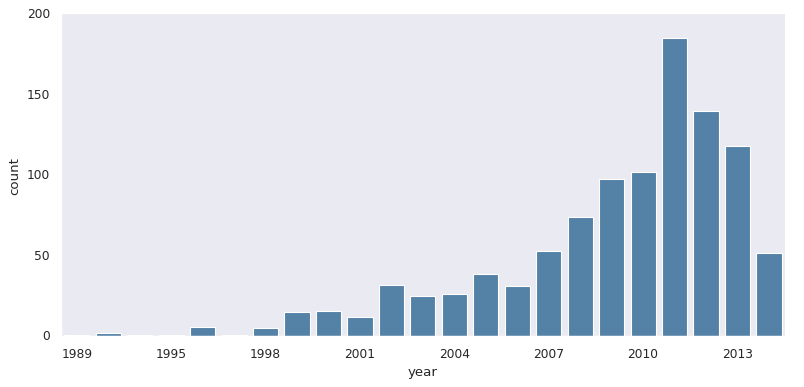

In [ ]:
with sns.axes_style('dark'):
    g = sns.catplot(x="year", data=planets, aspect=2, color='steelblue', kind='count')
    g.set_xticklabels(step=3)

We can learn more by looking at the *method* of discovery of each of these planets:

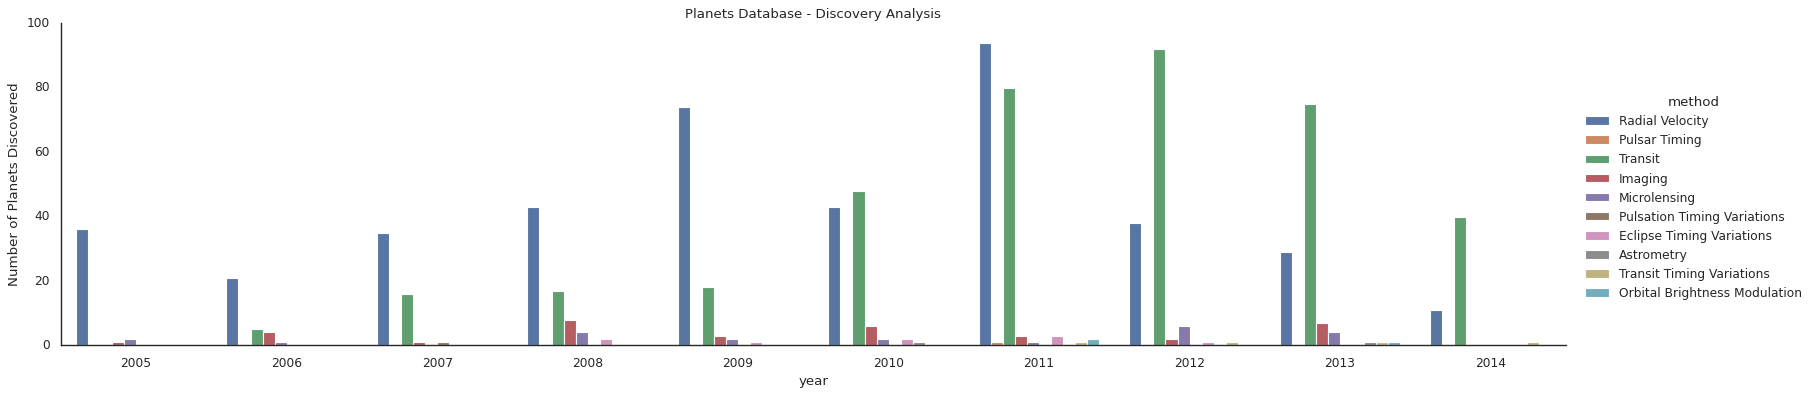

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, hue='method', kind='count',order=range(2005, 2015))

    g.set(title='Planets Database - Discovery Analysis')
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/tutorial.htm),    
and the [**Seaborn Gallery**](http://seaborn.pydata.org/examples/index.html).